<a href="https://colab.research.google.com/github/HenriqueCF8896/MNCM/blob/main/Programa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite os chutes iniciais para o método da Secante (dois números separados por espaço):
2 4
Digite os chutes iniciais para o método de Müller (três números separados por espaço):
6 7 8

=== Método da Secante ===
Iteração | Aproximação (x) | Erro Relativo (%)
       0 |        2.000000 |          33.333333
       1 |        4.000000 |          33.333333
       2 |        3.400000 |          13.333333
       3 |        2.076134 |          30.795540
       4 |        3.084825 |           2.827492
       5 |        3.010846 |           0.361519
       6 |        2.999582 |           0.013941
       7 |        3.000002 |           0.000064
       8 |        3.000000 |           0.000000
       9 |        3.000000 |           0.000000

=== Método de Müller ===
Iteração | Aproximação (x) | Erro Relativo (%)
       0 |        6.000000 |          14.285714
       1 |        7.000000 |           0.000000
       2 |        8.000000 |          14.285714
       3 |        7.000000 |           0.000

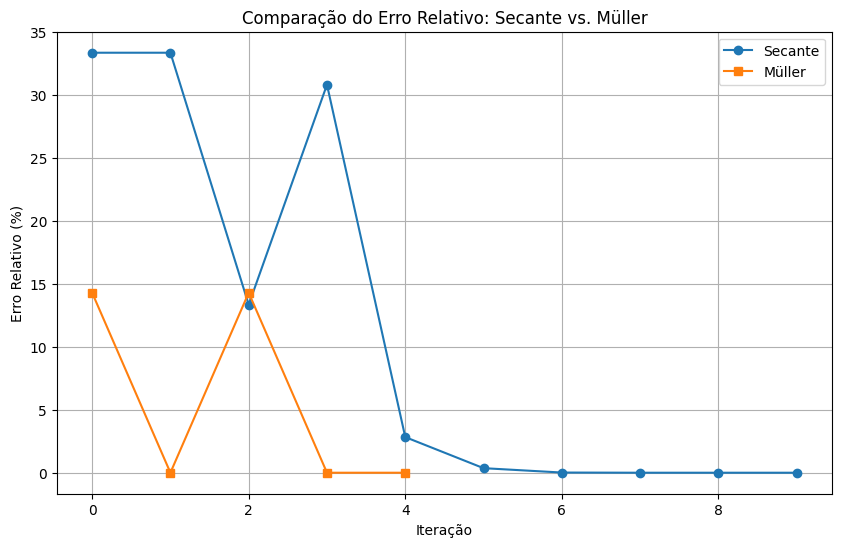

In [7]:
import math
import matplotlib.pyplot as plt

# Define o polinômio f(x) = (x-1)(x-3)(x-5)(x-7)(x-9) com raízes conhecidas [1, 3, 5, 7, 9]
def f(x):
    return (x - 1) * (x - 3) * (x - 5) * (x - 7) * (x - 9)

# Método da Secante: busca uma raiz a partir de dois pontos iniciais
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iterations = [x0, x1]  # Armazena todas as aproximações
    for _ in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1 - fx0) < 1e-12:  # Evita divisão por zero
            break
        x_next = x1 - fx1 * (x1 - x0) / (fx1 - fx0)  # Fórmula da secante
        iterations.append(x_next)
        if abs(x_next - x1) < tol:  # Verifica convergência
            break
        x0, x1 = x1, x_next  # Atualiza os pontos para a próxima iteração
    return iterations

# Método de Müller: busca uma raiz a partir de três pontos iniciais
def muller_method(f, x0, x1, x2, tol=1e-6, max_iter=100):
    iterations = [x0, x1, x2]  # Armazena todas as aproximações
    for _ in range(max_iter):
        f0 = f(x0)
        f1 = f(x1)
        f2 = f(x2)
        h1 = x1 - x0
        h2 = x2 - x1
        # Calcula as diferenças divididas
        d1 = (f1 - f0) / h1 if h1 != 0 else 0
        d2 = (f2 - f1) / h2 if h2 != 0 else 0
        # Coeficientes da parábola (ax² + bx + c)
        a = (d2 - d1) / (h2 + h1) if (h2 + h1) != 0 else 0
        b = d2 + a * h2
        c = f2
        # Calcula a raiz da parábola
        discriminant = b**2 - 4 * a * c
        if discriminant < 0:
            sqrt_d = math.sqrt(-discriminant) * 1j  # Raiz complexa
        else:
            sqrt_d = math.sqrt(discriminant)
        # Escolhe o denominador com maior magnitude
        denominator_plus = b + sqrt_d
        denominator_minus = b - sqrt_d
        if abs(denominator_plus) > abs(denominator_minus):
            z = (-2 * c) / denominator_plus
        else:
            z = (-2 * c) / denominator_minus
        # Mantém apenas a parte real (ignora complexos)
        if isinstance(z, complex):
            z = z.real
        x3 = x2 + z  # Nova aproximação
        iterations.append(x3)
        if abs(z) < tol:  # Verifica convergência
            break
        x0, x1, x2 = x1, x2, x3  # Atualiza os pontos
    return iterations

# Encontra a raiz mais próxima de uma aproximação
def find_closest_root(approx, roots=[1, 3, 5, 7, 9]):
    closest = None
    min_dist = float('inf')
    for root in roots:
        dist = abs(approx - root)
        if dist < min_dist:
            min_dist = dist
            closest = root
    return closest

# Entrada de dados do usuário
print("Digite os chutes iniciais para o método da Secante (dois números separados por espaço):")
x0_sec, x1_sec = map(float, input().split())
print("Digite os chutes iniciais para o método de Müller (três números separados por espaço):")
x0_mul, x1_mul, x2_mul = map(float, input().split())

# Executa os métodos
secant_iterations = secant_method(f, x0_sec, x1_sec)
muller_iterations = muller_method(f, x0_mul, x1_mul, x2_mul)

# Determina a raiz mais próxima do resultado final
secant_root = find_closest_root(secant_iterations[-1])
muller_root = find_closest_root(muller_iterations[-1])

# Calcula erros relativos percentuais
secant_errors = [abs((xi - secant_root) / secant_root) * 100 for xi in secant_iterations]
muller_errors = [abs((xi - muller_root) / muller_root) * 100 for xi in muller_iterations]

# Gera tabelas de iterações
print("\n=== Método da Secante ===")
print("Iteração | Aproximação (x) | Erro Relativo (%)")
for i, (xi, err) in enumerate(zip(secant_iterations, secant_errors)):
    print(f"{i:8} | {xi:15.6f} | {err:18.6f}")

print("\n=== Método de Müller ===")
print("Iteração | Aproximação (x) | Erro Relativo (%)")
for i, (xi, err) in enumerate(zip(muller_iterations, muller_errors)):
    print(f"{i:8} | {xi:15.6f} | {err:18.6f}")

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(len(secant_errors)), secant_errors, 'o-', label='Secante')
plt.plot(range(len(muller_errors)), muller_errors, 's-', label='Müller')
plt.xlabel('Iteração')
plt.ylabel('Erro Relativo (%)')
plt.title('Comparação do Erro Relativo: Secante vs. Müller')
plt.legend()
plt.grid(True)
plt.show()